# TP 2 : Régression par minimisation avec 2 variables

## Problème 1
On considère les points $(1,3)$, $(3,3)$ et $(5,4)$

On cherche l'ordonnée à l'origine $b$ et le coefficient directeur $w$ de la droite d'équation $$y=wx+b$$ minimisant la somme des carrés des distances verticales entre les points et la droite (comme représenté ci-dessous) :
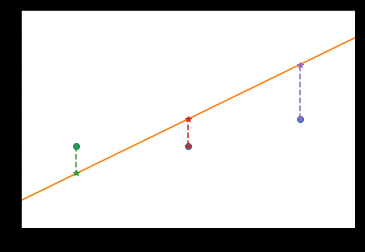

**Exercice 1 (sur papier).** 
1. Modéliser le programme d'optimisation à résoudre.
2. Montrer que le critère noté $f(b,w)$ est une fonction convexe
3. Résoudre $[\text{grad f}](b,w)=\left(\begin{array}{c}0\\0\end{array}\right)$ et conclure.

## Exploration graphique

In [6]:
# Chargement des librairies Python

# Mathématiques 
import numpy as np

# Graphique
from matplotlib import pyplot as plt

### Définition des points

La liste des points $(1,3)$, $(3,3)$ et $(5,4)$ se définit par la liste des abscisses et la liste des ordonnées.

In [7]:
X=[1,3,5]
Y=[3,3,4]

### Visualisation des points

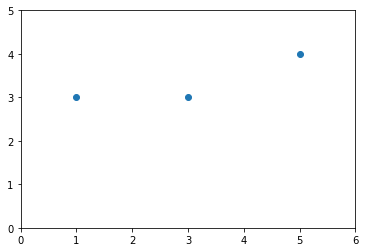

In [8]:
plt.axis([0,6,0,5]) # xmin,xmax,ymin,ymax
plt.plot(X,Y,'o') # représentation graphique des points

### Visualisation d'une droite de régression (pas forcément optimale)

Text(0, 6, ' $\\sum d_i^2=$6')

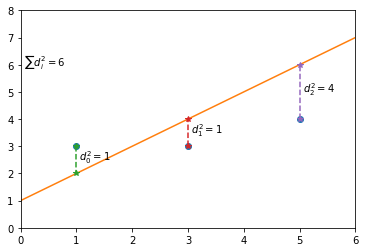

In [13]:
w=1
b=1
plt.axis([0,6,0,8])
plt.plot(X,Y,'o')
plt.plot([0,6],[b+w*0,b+w*6])
for i in range(len(X)):
    plt.plot([X[i],X[i]],[Y[i],b+w*X[i]],'*--')
    
dTotale=0
for i in range(len(X)):
    di=(Y[i]-(b+w*X[i]))**2
    plt.text(X[i],(Y[i]+b+w*X[i])/2,' $d_'+str(i)+'^2=$'+str(di))
    dTotale=dTotale+di
plt.text(0,6,' $\sum d_i^2=$'+str(dTotale))

***Exercice 2***
    
Vérifier à l'aide de la figure ci-dessus que les valeurs $b^*$ et $w^*$ trouvées à l'exercice 1 minimise bien la somme des carrés des distances verticales à la droite.

## Représentation graphique de la fonction à minimiser

### Définition de la fonction

In [14]:
def f(b,w):
    return np.sum([(b+w*X[i]-Y[i])**2 for i in range(len(X))])

### Création d'un tableau de valeurs pour $f$

***Exercice 3***

Les valeurs de $f$ sont à calculer pour un ensemble de $b$ et un ensemble de $w$.

Pour créer un tableau de valeurs de $f$, on construit une liste de valeurs de $w$, puis, pour chaque valeur de $w$, une liste de valeurs de $b$, selon le code suivant :
- `Liste1=[1,2,3,4]`
- `Liste2=[1,2,3,4]`
- `Valeurs=[[calcul(x,y) for x in Liste1] for y in Liste2]]`

En supposant par exemple que `calcul(x,y)=x*y', quel est le contenu de la liste `Valeurs` ci-dessus ?

In [37]:
# Tableau de valeur de f

wlist=np.linspace(-5,5,50) # crée une liste de 50 nombres régulièrement espacés entre -5 et 5
blist=np.linspace(-5,5,50) # crée une liste de 50 nombres régulièrement espacés entre -5 et 5
flist=[[f(b,w) for b in blist] for w in wlist] # Tableau de valeur à 2 dimensions

### Représentation graphique de la fonction

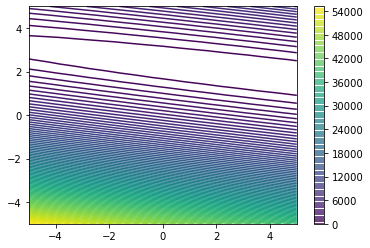

In [41]:
plt.axis([-5,5,-5,5])
plt.contour(blist,wlist,flist,100) # crée 100 courbes de niveau de la fonction f
plt.colorbar() # affiche une légende avec les niveaux

**Exercice 3.**
Peut-on lire, sur le graphique la solution $(b,w)$ optimale calculée dans l'exercice 1 ?

## Problème 2

On se donne un paquet de 20 points (générés aléatoirement), on cherche à déterminer la droite $y=b+wx$ minimisant la somme des carrés des distances verticales entre les points et la droite

### Génération aléatoire des points

In [42]:
# Génère uniformément 20 nombres entre 0 et 10
X=np.random.uniform(0, 10, 20)
# Génère 20 nombres y autour de la droite y=2x+3
# la fonction np.random.random_sample() renvoie un nombre aléatoire entre 0 et 1
Y=[2*X[i]+3 for i in range(len(X))]
Y=Y+(np.random.uniform(0,6,20)-3) # ajoute un nombre aléatoire entre -1 et 1 à tous les Y[i]
print('X=',X)
print('Y=',Y)

X= [2.91491861 5.90214191 5.98418056 2.725236   5.98907887 3.82359691
 9.28280119 6.0092864  3.40083867 2.15138237 0.05582971 2.97045156
 5.87945206 1.40881841 8.25004972 4.58947406 9.46704519 1.73768036
 3.56130445 4.31213849]
Y= [11.5982676  15.14940096 17.5236606   8.58284724 17.35278437 11.993902
 24.11818101 14.56443162  9.47997724  7.13197552  2.23041786  7.6001525
 16.32843868  5.93769723 18.35897272 11.42454834 19.00122856  4.90135432
  9.8980927  10.55054762]


### Nuage des points

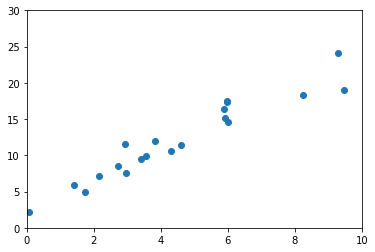

In [43]:
plt.axis([0,10,0,30])
plt.plot(X,Y,'o')

**Exercice 5.**

En vous inspirant des calculs précédent, compléter les 4 cellules ci-dessous afin de résoudre graphiquement le problème :
- Programmer la fonction à minimiser
- Représenter ses courbes de niveau
- Déterminer une valeur approximative de son minimum
- Tracer le nuage de point ainsi que la droite de régression trouvée